# Time-based Features Extraction Tutorial

In this tutorial, we will learn how to extract various time-based features from timestamps. We will cover:
1. Timestamps: year, month, day of the week, hour, minutes, seconds
2. Time since last event/observation
3. Seasonality indicators using sine and cosine transformations


In [1]:
# First, let's import necessary libraries

import pandas as pd
import numpy as np

## 1. Timestamps Extraction

We'll start by creating a sample DataFrame with a datetime column.


In [2]:
# Sample DataFrame
df = pd.DataFrame({
    'datetime': ['2023-01-01 12:34:56', '2023-01-02 14:35:30', '2023-01-03 16:10:45']
})

df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime
0,2023-01-01 12:34:56
1,2023-01-02 14:35:30
2,2023-01-03 16:10:45


Now, we can extract various components from the datetime column.


In [3]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df['minutes'] = df['datetime'].dt.minute
df['seconds'] = df['datetime'].dt.second

In [4]:
df

,datetime,year,month,day_of_week,hour,minutes,seconds
0,2023-01-01 12:34:56,2023,1,6,12,34,56
1,2023-01-02 14:35:30,2023,1,0,14,35,30
2,2023-01-03 16:10:45,2023,1,1,16,10,45


## 2. Time Since Last Event/Observation

To compute the time since the last observation, we can use the `diff()` function on the datetime column.


In [5]:
df['time_since_last'] = df['datetime'].diff().dt.total_seconds()

In [6]:
df

,datetime,year,month,day_of_week,hour,minutes,seconds,time_since_last
0,2023-01-01 12:34:56,2023,1,6,12,34,56,NaN
1,2023-01-02 14:35:30,2023,1,0,14,35,30,93634.0
2,2023-01-03 16:10:45,2023,1,1,16,10,45,92115.0


## 3. Seasonality Indicators: Sin and Cos Transformation

For handling cyclic features like hour, day of the week, etc., we can use sin and cos transformations to preserve their cyclic nature. For example, the hour 23 and hour 0 are just one hour apart, but if used as raw numbers, they seem far apart.

To handle this, we can map each cyclic feature onto a circle such that the lowest value for that feature appears right next to the highest value. The sine and cosine transformations help in this.


In [8]:
# Hour, for instance, can be transformed as:
hours_in_a_day = 24

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / hours_in_a_day)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / hours_in_a_day)

# Similarly, for day of the week:
days_in_a_week = 7

df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / days_in_a_week)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / days_in_a_week)


In [9]:
df

,datetime,year,month,day_of_week,hour,minutes,seconds,time_since_last,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos
0,2023-01-01 12:34:56,2023,1,6,12,34,56,NaN,1.224647e-16,-1.000000,-0.781831,0.62349
1,2023-01-02 14:35:30,2023,1,0,14,35,30,93634.0,-5.000000e-01,-0.866025,0.000000,1.00000
2,2023-01-03 16:10:45,2023,1,1,16,10,45,92115.0,-8.660254e-01,-0.500000,0.781831,0.62349


# Statistical Features Extraction Tutorial

In this tutorial, we'll dive into how to compute various statistical features from a time-series dataset. We'll cover:
1. Rolling means and medians
2. Standard deviation, variance, skewness, and kurtosis


In [16]:
# Let's begin by importing necessary libraries.

import pandas as pd
import numpy as np

## 1. Rolling Means and Medians

Rolling statistics provide insights into local patterns in the time series, which can be obscured when looking at data on a larger scale. 

To demonstrate, we'll first generate some synthetic data.


In [17]:
# Sample time-series data
np.random.seed(0)
data = np.random.randn(100).cumsum()
dates = pd.date_range(start="2023-01-01", periods=100)
df = pd.DataFrame(data, columns=['value'], index=dates)
df.head()


,value
2023-01-01,1.764052
2023-01-02,2.164210
2023-01-03,3.142948
2023-01-04,5.383841
2023-01-05,7.251399


Now, let's compute the rolling mean and median.


In [18]:
window_size = 5  # You can adjust this as per your requirements

df['rolling_mean'] = df['value'].rolling(window=window_size).mean()
df['rolling_median'] = df['value'].rolling(window=window_size).median()

df.head(10)  # Display the first 10 rows


,value,rolling_mean,rolling_median
2023-01-01,1.764052,NaN,NaN
2023-01-02,2.164210,NaN,NaN
2023-01-03,3.142948,NaN,NaN
2023-01-04,5.383841,NaN,NaN
2023-01-05,7.251399,3.941290,3.142948
2023-01-06,6.274121,4.843303,5.383841
2023-01-07,7.224209,5.855303,6.274121
2023-01-08,7.072852,6.641284,7.072852
2023-01-09,6.969633,6.958443,7.072852
2023-01-10,7.380232,6.984209,7.072852


## 2. Standard Deviation, Variance, Skewness, and Kurtosis

These statistical measures can help in understanding the distribution and volatility of your time series.


In [19]:
df['std_dev'] = df['value'].rolling(window=window_size).std()
df['variance'] = df['value'].rolling(window=window_size).var()

# Skewness and Kurtosis
df['skewness'] = df['value'].rolling(window=window_size).apply(lambda x: x.skew(), raw=False)
df['kurtosis'] = df['value'].rolling(window=window_size).apply(lambda x: x.kurtosis(), raw=False)

df.head(10)


,value,rolling_mean,rolling_median,std_dev,variance,skewness,kurtosis
2023-01-01,1.764052,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,2.164210,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,3.142948,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,5.383841,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,7.251399,3.941290,3.142948,2.322364,5.393375,0.759404,-1.243352
2023-01-06,6.274121,4.843303,5.383841,2.133489,4.551774,-0.304370,-2.100707
2023-01-07,7.224209,5.855303,6.274121,1.701290,2.894386,-1.243817,1.178517
2023-01-08,7.072852,6.641284,7.072852,0.808434,0.653566,-1.208250,0.214264
2023-01-09,6.969633,6.958443,7.072852,0.399364,0.159492,-1.799277,3.391989
2023-01-10,7.380232,6.984209,7.072852,0.426242,0.181682,-1.514159,2.687407


# Window-based Features Extraction Tutorial

In this tutorial, we'll explore how to compute window-based features from time-series data. We'll cover:
1. Understanding the window size
2. Minimum, maximum, average, and sum within a window
3. Windowed time lags


In [20]:
# Starting off by importing the necessary libraries.

import pandas as pd
import numpy as np


## 1. Understanding the Window Size

The window size determines how many consecutive observations will be used to compute statistics. A larger window size may capture longer-term patterns, but could smooth out short-term fluctuations. On the other hand, a smaller window size can capture short-term patterns but may be more sensitive to noise.

For demonstration purposes, we'll generate some synthetic time-series data.


In [21]:
# Sample time-series data
np.random.seed(0)
data = np.random.randn(100).cumsum()
dates = pd.date_range(start="2023-01-01", periods=100)
df = pd.DataFrame(data, columns=['value'], index=dates)
df.head()


,value
2023-01-01,1.764052
2023-01-02,2.164210
2023-01-03,3.142948
2023-01-04,5.383841
2023-01-05,7.251399


## 2. Minimum, Maximum, Average, and Sum within a Window

Now, we'll compute various statistics within our window.


In [22]:
window_size = 7  # This is a sample window size. Adjust as needed.

df['window_min'] = df['value'].rolling(window=window_size).min()
df['window_max'] = df['value'].rolling(window=window_size).max()
df['window_avg'] = df['value'].rolling(window=window_size).mean()
df['window_sum'] = df['value'].rolling(window=window_size).sum()

df.head(10)


,value,window_min,window_max,window_avg,window_sum
2023-01-01,1.764052,NaN,NaN,NaN,NaN
2023-01-02,2.164210,NaN,NaN,NaN,NaN
2023-01-03,3.142948,NaN,NaN,NaN,NaN
2023-01-04,5.383841,NaN,NaN,NaN,NaN
2023-01-05,7.251399,NaN,NaN,NaN,NaN
2023-01-06,6.274121,NaN,NaN,NaN,NaN
2023-01-07,7.224209,1.764052,7.251399,4.743540,33.204779
2023-01-08,7.072852,2.164210,7.251399,5.501940,38.513579
2023-01-09,6.969633,3.142948,7.251399,6.188429,43.319002
2023-01-10,7.380232,5.383841,7.380232,6.793755,47.556287


## 3. Windowed Time Lags

Time lags can be an effective way to capture temporal dependencies in the data. With windowed time lags, we introduce a series of lagged features, each one offset by an additional time step.


In [24]:
number_of_lags = 3  # This means we will create 3 lagged features for our data.

for i in range(1, number_of_lags + 1):
    df[f'lag_{i}'] = df['value'].shift(i)

df.head(5)

,value,window_min,window_max,window_avg,window_sum,lag_1,lag_2,lag_3
2023-01-01,1.764052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,2.164210,NaN,NaN,NaN,NaN,1.764052,NaN,NaN
2023-01-03,3.142948,NaN,NaN,NaN,NaN,2.164210,1.764052,NaN
2023-01-04,5.383841,NaN,NaN,NaN,NaN,3.142948,2.164210,1.764052
2023-01-05,7.251399,NaN,NaN,NaN,NaN,5.383841,3.142948,2.164210


# Frequency Domain Features Extraction Tutorial

In this tutorial, we'll explore how to compute frequency domain features from time-series data. The topics covered include:
1. Fourier Transform and its applications
2. Spectral analysis
3. Power spectral density


In [25]:
# Begin by importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch


## 1. Fourier Transform and its applications

The Fourier Transform is a mathematical tool that transforms our time-domain signal into the frequency domain. This can be helpful in determining dominant frequencies in a signal.


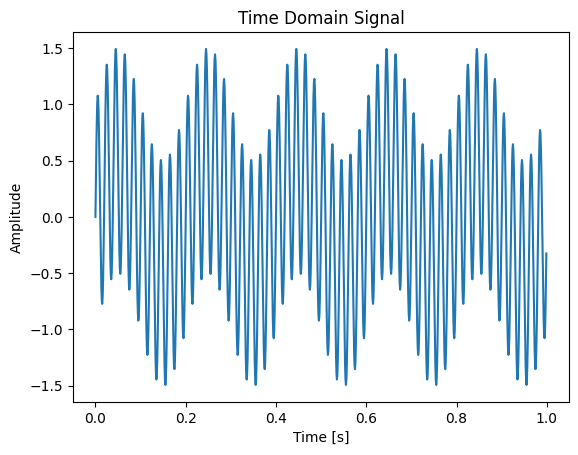

In [27]:
# Generating a sample time-series data with two main frequencies for demonstration

fs = 1000  # Sampling rate
t = np.linspace(0, 1, fs, endpoint=False)  # Time array

# Creating a signal with two main frequencies: 5Hz and 50Hz
freq1 = 5  # in Hz
freq2 = 50  # in Hz
signal = 0.5 * np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


## 2. Spectral Analysis

The plot above provides a spectral analysis of our time-series data, revealing the dominant frequencies in our signal.


Now, let's apply the Fourier Transform to convert this signal to the frequency domain.


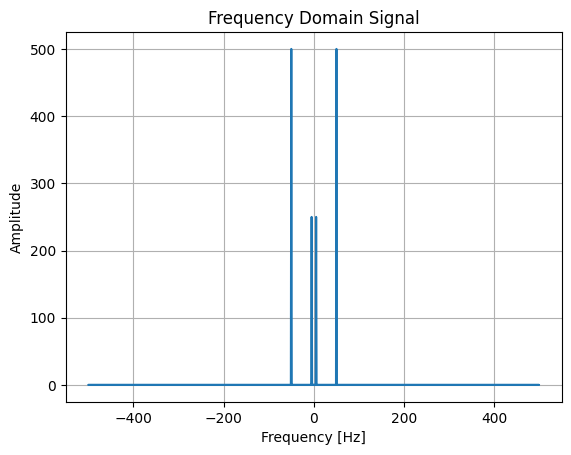

In [28]:
yf = fft(signal)
xf = fftfreq(fs, 1 / fs)

plt.plot(xf, np.abs(yf))
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


## 3. Spectrogram

The spectrogram provides a 2D representation of how frequencies evolve over time. Darker regions indicate lower power, while brighter regions show higher power at particular frequencies.


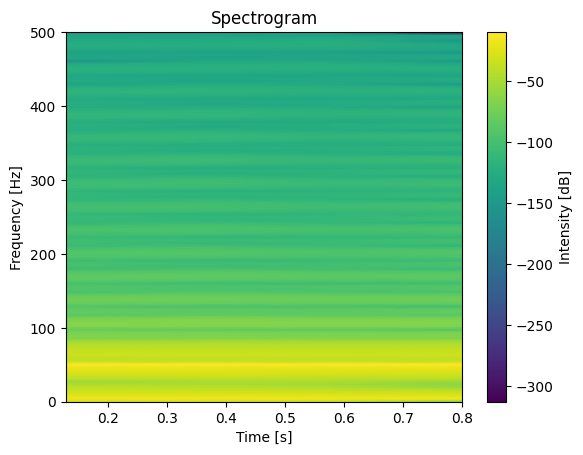

In [30]:
from scipy.signal import spectrogram

frequencies, times, Sxx = spectrogram(signal, fs)

plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.title("Spectrogram")
plt.show()


# Domain-specific Features Extraction for IoT Sensors

In this tutorial, we'll focus on extracting domain-specific features from typical IoT sensor data, including:

1. Sensors' physical context: acceleration, temperature, humidity, light, etc.
2. Knowledge-driven features based on the IoT device's application.


In [31]:
# Let's begin by importing the necessary libraries.

import pandas as pd
import numpy as np


## 1. Sensors' Physical Context

Suppose we have a dataset from a multi-sensor IoT device. We'll simulate this dataset for our tutorial.


In [32]:
# Generate a simulated dataset
np.random.seed(42)

timestamps = pd.date_range(start="2023-01-01", periods=100, freq='H')
data = {
    'acceleration': np.random.randn(100).cumsum(),
    'temperature': 22 + np.random.normal(0, 0.5, 100).cumsum(),
    'humidity': 50 + np.random.normal(0, 1, 100).cumsum(),
    'light': np.random.randint(100, 500, 100)
}

df = pd.DataFrame(data, index=timestamps)
df.head()


,acceleration,temperature,humidity,light
2023-01-01 00:00:00,0.496714,21.292315,50.357787,348
2023-01-01 01:00:00,0.358450,21.081992,50.918572,263
2023-01-01 02:00:00,1.006138,20.910635,52.001623,493
2023-01-01 03:00:00,2.529168,20.509496,53.055425,456
2023-01-01 04:00:00,2.295015,20.428853,51.677756,291


Given the physical context, we can extract features like:

- Mean and variance of acceleration (useful for motion-based applications)
- Mean temperature over the last 'n' hours
- Relative change in humidity
- Light intensity shifts (e.g., detecting if a room suddenly gets dark)


In [33]:
df['mean_acceleration_last_5h'] = df['acceleration'].rolling(window=5).mean()
df['var_acceleration'] = df['acceleration'].rolling(window=5).var()
df['mean_temperature_last_3h'] = df['temperature'].rolling(window=3).mean()
df['relative_humidity_change'] = df['humidity'].pct_change()
df['light_intensity_shift'] = df['light'].diff()

df.head(10)


,acceleration,temperature,humidity,light,mean_acceleration_last_5h,var_acceleration,mean_temperature_last_3h,relative_humidity_change,light_intensity_shift
2023-01-01 00:00:00,0.496714,21.292315,50.357787,348,NaN,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,0.358450,21.081992,50.918572,263,NaN,NaN,NaN,0.011136,-85.0
2023-01-01 02:00:00,1.006138,20.910635,52.001623,493,NaN,NaN,21.094980,0.021270,230.0
2023-01-01 03:00:00,2.529168,20.509496,53.055425,456,NaN,NaN,20.834041,0.020265,-37.0
2023-01-01 04:00:00,2.295015,20.428853,51.677756,291,1.337097,1.028042,20.616328,-0.025967,-165.0
2023-01-01 05:00:00,2.060878,20.630879,50.739931,326,1.649930,0.860115,20.523076,-0.018148,35.0
2023-01-01 06:00:00,3.640091,21.573972,51.254966,276,2.306258,0.894862,20.877901,0.010150,-50.0
2023-01-01 07:00:00,4.407525,21.661261,51.768752,198,2.986535,0.997644,21.288704,0.010024,-78.0
2023-01-01 08:00:00,3.938051,21.790036,52.283800,135,3.268312,1.072445,21.675089,0.009949,-63.0
2023-01-01 09:00:00,4.480611,21.752813,56.136531,195,3.705431,0.964194,21.734703,0.073689,60.0


## 2. Knowledge-driven Features based on IoT Device's Application

Assuming this IoT device is in a smart home environment, we can derive features that relate to human activity or ambient conditions. 

For example:
- Sudden drops in light intensity might indicate someone turned off the lights.
- Rapid changes in acceleration might mean the device was moved or shaken.
- Consistent rises in temperature and humidity might suggest someone's cooking.


In [34]:
# Detecting light being turned off
df['light_off_event'] = (df['light_intensity_shift'] < -100).astype(int)

# Detecting device being moved or shaken
df['device_moved'] = (df['var_acceleration'] > 1.5).astype(int)

# Detecting potential cooking event
df['potential_cooking'] = ((df['mean_temperature_last_3h'] > 23) & 
                           (df['relative_humidity_change'] > 0.02)).astype(int)

df.head(10)


,acceleration,temperature,humidity,light,mean_acceleration_last_5h,var_acceleration,mean_temperature_last_3h,relative_humidity_change,light_intensity_shift,light_off_event,device_moved,potential_cooking
2023-01-01 00:00:00,0.496714,21.292315,50.357787,348,NaN,NaN,NaN,NaN,NaN,0,0,0
2023-01-01 01:00:00,0.358450,21.081992,50.918572,263,NaN,NaN,NaN,0.011136,-85.0,0,0,0
2023-01-01 02:00:00,1.006138,20.910635,52.001623,493,NaN,NaN,21.094980,0.021270,230.0,0,0,0
2023-01-01 03:00:00,2.529168,20.509496,53.055425,456,NaN,NaN,20.834041,0.020265,-37.0,0,0,0
2023-01-01 04:00:00,2.295015,20.428853,51.677756,291,1.337097,1.028042,20.616328,-0.025967,-165.0,1,0,0
2023-01-01 05:00:00,2.060878,20.630879,50.739931,326,1.649930,0.860115,20.523076,-0.018148,35.0,0,0,0
2023-01-01 06:00:00,3.640091,21.573972,51.254966,276,2.306258,0.894862,20.877901,0.010150,-50.0,0,0,0
2023-01-01 07:00:00,4.407525,21.661261,51.768752,198,2.986535,0.997644,21.288704,0.010024,-78.0,0,0,0
2023-01-01 08:00:00,3.938051,21.790036,52.283800,135,3.268312,1.072445,21.675089,0.009949,-63.0,0,0,0
2023-01-01 09:00:00,4.480611,21.752813,56.136531,195,3.705431,0.964194,21.734703,0.073689,60.0,0,0,0


# Lagged Features Extraction in Time-Series Analysis

In this tutorial, we'll delve deep into:
1. Autocorrelation and partial autocorrelation
2. Creating lagged variables based on autocorrelation results


In [35]:
# First, let's import the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## 1. Autocorrelation and Partial Autocorrelation

Autocorrelation measures the linear relationship between lagged values of a time series. Partial autocorrelation, on the other hand, measures the correlation between a point and a lagged point after removing correlations due to intervening points.


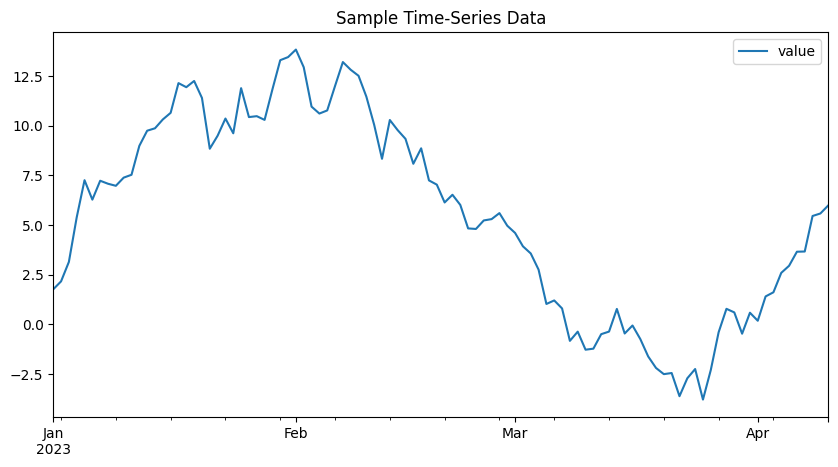

In [36]:
# For demonstration, we'll generate a sample time-series data

np.random.seed(0)
data = np.random.randn(100).cumsum()
dates = pd.date_range(start="2023-01-01", periods=100)
df = pd.DataFrame(data, columns=['value'], index=dates)

df.plot(figsize=(10, 5), title="Sample Time-Series Data")
plt.show()


Now, let's compute and visualize the autocorrelation and partial autocorrelation.


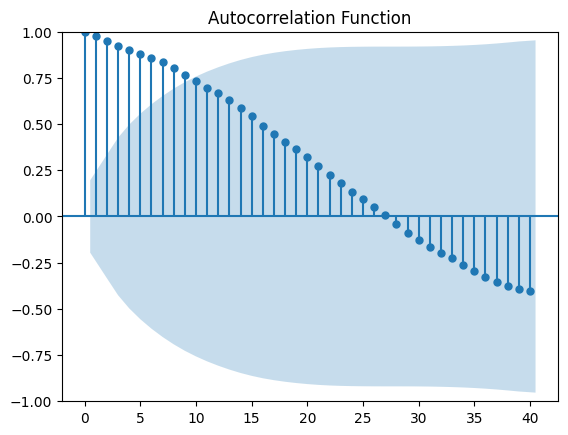

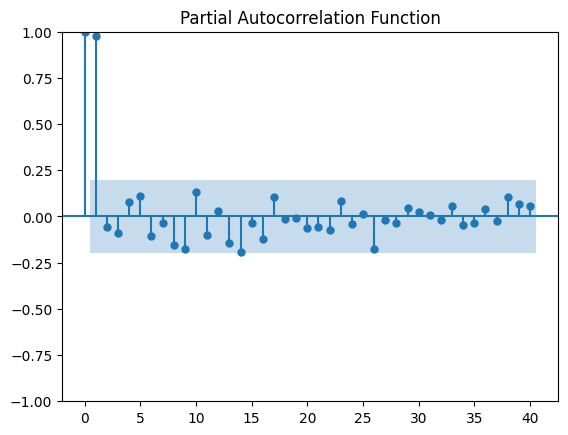

In [37]:
# Plotting ACF
plot_acf(df['value'], lags=40)
plt.title('Autocorrelation Function')
plt.show()

# Plotting PACF
plot_pacf(df['value'], lags=40)
plt.title('Partial Autocorrelation Function')
plt.show()


From the plots, we can identify significant lags which might be useful for feature engineering or for configuring time-series models.


## 2. Creating Lagged Variables Based on Autocorrelation Results

Lagged variables are essential in time-series forecasting. They can capture patterns over time, which can be particularly useful in autoregressive models. Based on the ACF and PACF plots, we can determine which lags might be significant and create lagged features for them.


In [38]:
# Here, for demonstration, let's create lagged variables for lags 1, 2, and 3.
# In a real-world scenario, you'd choose the lags based on the significance observed in the ACF/PACF plots.

for i in range(1, 4):
    df[f'lag_{i}'] = df['value'].shift(i)

df.head(5)


,value,lag_1,lag_2,lag_3
2023-01-01,1.764052,NaN,NaN,NaN
2023-01-02,2.164210,1.764052,NaN,NaN
2023-01-03,3.142948,2.164210,1.764052,NaN
2023-01-04,5.383841,3.142948,2.164210,1.764052
2023-01-05,7.251399,5.383841,3.142948,2.164210


# Embedding Techniques for Time-Series Analysis

In this tutorial, we'll cover:
1. Word2Vec for time series
2. Autoencoders for dimensionality reduction


In [45]:
!pip install gensim tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 15.6 MB/s eta 0:00:00
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.0 MB/s eta 0:00:00a 0:00:0

In [46]:
# Let's start by importing necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


## 1. Word2Vec for Time Series

Word2Vec, an algorithm from the field of natural language processing, can be adapted for time series data by treating sub-sequences (windows) of time series data as "sentences" and values as "words". This allows us to capture patterns within those windows.


In [53]:
# Generate some sample time series data for demonstration
np.random.seed(0)
data = np.random.randn(1000).cumsum()
dates = pd.date_range(start="2023-01-01", periods=1000)
time_series_df = pd.DataFrame(data, columns=['value'], index=dates)

# Discretize the time series values by rounding
rounded_series = time_series_df['value'].round(0).astype(str)
window_size = 5
# Convert the discretized time series data into "sentences"
sentences = []
for i in range(len(rounded_series) - window_size):
    sentence = list(rounded_series.iloc[i:i+window_size])
    sentences.append(sentence)

# Train Word2Vec model
model_w2v = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1)

# Now we can represent each window (or "word") with a 50-dimensional vector
sample_vector = model_w2v.wv[str(sentences[0][0])]
print(sample_vector)

[-0.01482914 -0.04193533 -0.01712794 -0.02580218 -0.04269874 -0.02972451
 -0.01924447  0.07443285 -0.060533   -0.10094529 -0.03165738 -0.11891574
  0.12169994  0.14917092 -0.05186183  0.05522289  0.04920878  0.04730087
 -0.05965915 -0.06936832  0.13040502  0.07934614  0.0810252  -0.05240461
  0.0389876   0.06486467 -0.05288386  0.13812816 -0.01848332  0.02894347
 -0.10883927 -0.07107785 -0.05577667 -0.06538966 -0.03838161 -0.02621892
  0.07247409  0.02922837 -0.039921    0.05970082  0.06412312  0.00451288
  0.09882686  0.03698302  0.05556344 -0.100316   -0.04703441 -0.10098708
  0.03560041  0.03646964]


The Word2Vec model can help in detecting patterns within windows of time series data, and representing them in a more compact form.


## 2. Autoencoders for Dimensionality Reduction

Autoencoders are neural networks used for dimensionality reduction. They work by compressing the input into a compact latent space and then reconstructing the input from this representation.


In [49]:
# Prepare the time series data for Autoencoder
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(time_series_df.values)

# Define the Autoencoder architecture
input_layer = Input(shape=(scaled_data.shape[1],))
encoded = Dense(50, activation='relu')(input_layer)
decoded = Dense(scaled_data.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=100, batch_size=16, shuffle=True, verbose=0)

# Extract the encoder
encoder = Model(input_layer, encoded)
encoded_data = encoder.predict(scaled_data)
print(encoded_data[:5])


32/32 [==============================] - 0s 302us/step
[[0.         0.32268062 0.         0.32397136 0.3720957  0.4679582
  0.         0.         0.5619535  0.10305091 0.         0.5721504
  0.66862816 0.         0.         0.44857293 0.5067015  0.
  0.         0.         0.         0.         0.55367506 0.48436147
  0.         0.         0.         0.5180008  0.         0.29936314
  0.         0.         0.         0.42050663 0.         0.
  0.         0.6139508  0.48139042 0.42925456 0.29693037 0.39644969
  0.         0.59776604 0.         0.30075774 0.44936427 0.
  0.         0.        ]
 [0.         0.3245678  0.         0.32586622 0.3742719  0.47069576
  0.         0.         0.56141776 0.10365537 0.         0.57177013
  0.668275   0.         0.         0.451196   0.509666   0.
  0.         0.         0.         0.         0.5539648  0.4871945
  0.         0.         0.         0.5210314  0.         0.30111262
  0.         0.         0.         0.42296517 0.         0.
  0.       

The encoded data represents the time series in a lower-dimensional space. This compressed representation can be used for various tasks such as clustering, anomaly detection, or any task that benefits from reduced dimensionality.


# Feature Selection and Reduction Techniques

In this tutorial, we'll explore:
1. Correlation and multicollinearity
2. Feature importance from tree-based models
3. Principal Component Analysis (PCA) for time series
4. Recursive feature elimination


In [54]:
# Let's start by importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression


## 1. Correlation and Multicollinearity

Correlation measures the relationship between two variables, while multicollinearity occurs when two or more variables are highly correlated.


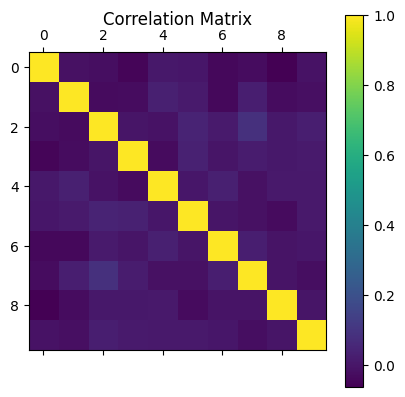

In [56]:
# Generate some sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Compute correlation matrix
correlation_matrix = df.corr()
plt.matshow(correlation_matrix)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

# If two features have high correlation, you might consider dropping one or combining them.


## 2. Feature Importance from Tree-based Models

Tree-based models like Random Forests can be used to estimate the importance of features.


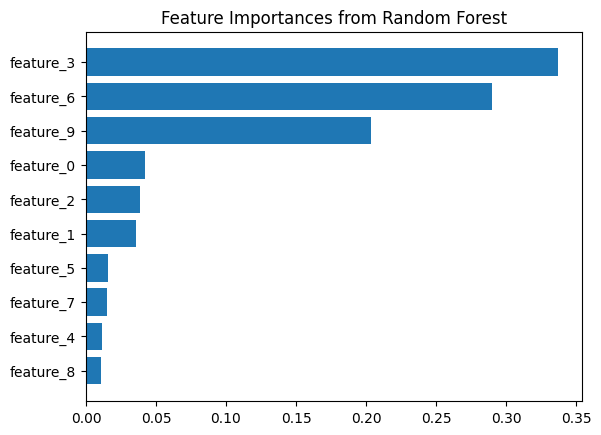

In [57]:
# Fit a RandomForestRegressor to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances from Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [df.columns[i] for i in indices])
plt.show()


## 3. Principal Component Analysis (PCA) for Time Series

PCA can be used to reduce the dimensionality of time series data.


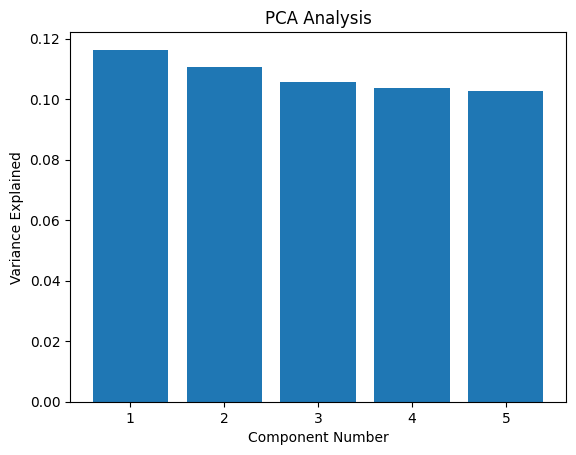

In [58]:
# Apply PCA
pca = PCA(n_components=5)  # reduce to 5 components
X_pca = pca.fit_transform(X)

# Plot variance explained by each component
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Variance Explained')
plt.title('PCA Analysis')
plt.show()

# X_pca can now be used in place of X for models that benefit from reduced dimensionality.


## 4. Recursive Feature Elimination

RFE recursively removes features, evaluates the model, and selects the best features.


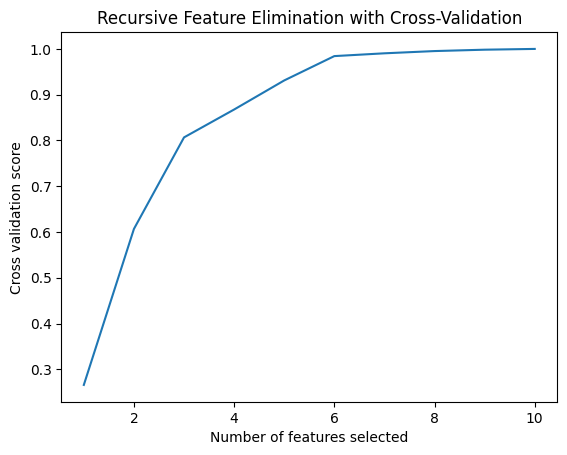

Selected Features: ['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_4' 'feature_5'
 'feature_6' 'feature_7' 'feature_8' 'feature_9']


In [60]:
# Apply RFE using a simple linear regression model
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
plt.show()

# Display the features that were selected
selected_features = np.array(df.columns)[selector.support_]
print("Selected Features:", selected_features)


Using a combination of these techniques, we can effectively reduce the dimensionality of our dataset and select the most important features to enhance our model's performance.


# Handling Irregular Time Series

In this tutorial, we'll cover:
1. Resampling methods: up-sampling and down-sampling
2. Interpolation techniques


In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 1. Resampling Methods

Resampling is used to convert a time series from one frequency to another. 
- **Up-sampling** increases the frequency of the samples, such as from minutes to seconds.
- **Down-sampling** decreases the frequency of the samples, such as from days to months.


In [62]:
# Creating a sample irregular time series
date_rng = pd.date_range(start='2022-01-01', end='2022-01-10', freq='3D')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

# Set date as index
df.set_index('date', inplace=True)

print("Original Data:")
print(df)

# Up-sampling: Convert data to a daily frequency
df_daily = df.resample('D').asfreq()
print("\nUp-sampled Data:")
print(df_daily)

# Down-sampling: Convert data to a 5-day frequency
df_5day = df.resample('5D').mean()
print("\nDown-sampled Data:")
print(df_5day)


Original Data:
            data
date            
2022-01-01    46
2022-01-04    38
2022-01-07    49
2022-01-10     8

Up-sampled Data:
            data
date            
2022-01-01  46.0
2022-01-02   NaN
2022-01-03   NaN
2022-01-04  38.0
2022-01-05   NaN
2022-01-06   NaN
2022-01-07  49.0
2022-01-08   NaN
2022-01-09   NaN
2022-01-10   8.0

Down-sampled Data:
            data
date            
2022-01-01  42.0
2022-01-06  28.5


## 2. Interpolation Techniques

Interpolation is used to fill missing values in a time series. It can be particularly useful after up-sampling.


Linear Interpolation:
            data  linear_fill
date                         
2022-01-01  46.0    46.000000
2022-01-02   NaN    43.333333
2022-01-03   NaN    40.666667
2022-01-04  38.0    38.000000
2022-01-05   NaN    41.666667
2022-01-06   NaN    45.333333
2022-01-07  49.0    49.000000
2022-01-08   NaN    35.333333
2022-01-09   NaN    21.666667
2022-01-10   8.0     8.000000

Polynomial Interpolation:
            data  linear_fill  polynomial_fill
date                                          
2022-01-01  46.0    46.000000        46.000000
2022-01-02   NaN    43.333333        39.907407
2022-01-03   NaN    40.666667        37.240741
2022-01-04  38.0    38.000000        38.000000
2022-01-05   NaN    41.666667        42.185185
2022-01-06   NaN    45.333333        48.481481
2022-01-07  49.0    49.000000        49.000000
2022-01-08   NaN    35.333333        42.425926
2022-01-09   NaN    21.666667        28.759259
2022-01-10   8.0     8.000000         8.000000


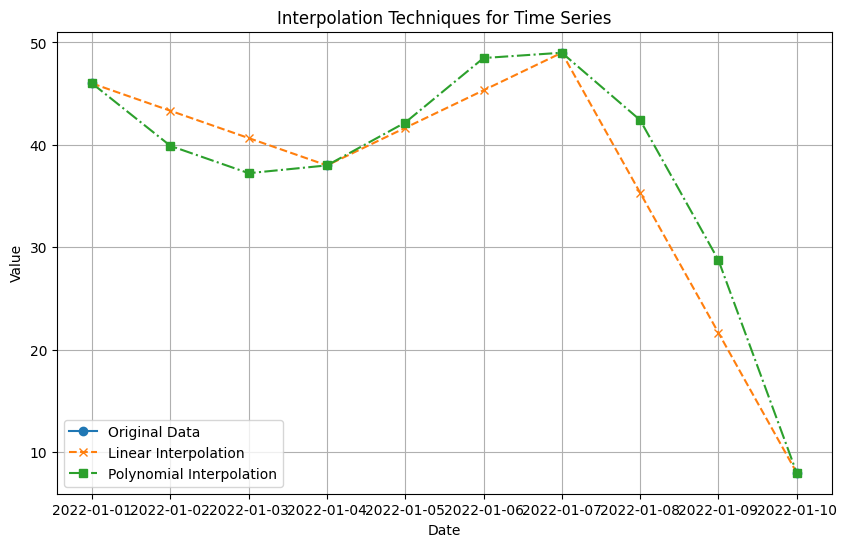

In [63]:
# Using linear interpolation to fill missing values after up-sampling
df_daily['linear_fill'] = df_daily['data'].interpolate(method='linear')
print("Linear Interpolation:")
print(df_daily)

# Using polynomial interpolation
df_daily['polynomial_fill'] = df_daily['data'].interpolate(method='polynomial', order=2)
print("\nPolynomial Interpolation:")
print(df_daily)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['data'], marker='o', label='Original Data')
plt.plot(df_daily.index, df_daily['linear_fill'], marker='x', linestyle='--', label='Linear Interpolation')
plt.plot(df_daily.index, df_daily['polynomial_fill'], marker='s', linestyle='-.', label='Polynomial Interpolation')
plt.legend()
plt.title('Interpolation Techniques for Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


Interpolation techniques can help in inferring the missing values in a time series. However, the technique to use largely depends on the nature of the data and the application.


# Advanced Techniques in Time Series Analysis

In this tutorial, we'll explore:
1. Wavelet Transformation for Multiresolution Analysis
2. Dynamic Time Warping for Similarity Features


In [69]:
!pip install PyWavelets fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3564 sha256=fabfb3347d3d1f88e02a15c45dfe2ccdf6288a93714bf4c50a3f7831c30db6bc
  Stored in directory: /Users/mc/Library/Caches/pip/wheels/5c/8a/f6/fd3df9a9714677410a5ccbf3ca519e66db4a54a1c46ea95332
Successfully built fastdtw


In [70]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


## 1. Wavelet Transformation for Multiresolution Analysis

Wavelet transformation allows us to represent a time series in terms of wavelets, which can capture both high-frequency and low-frequency patterns in the data. This is useful for multiresolution analysis, where we want to understand the data's behavior at various frequencies.


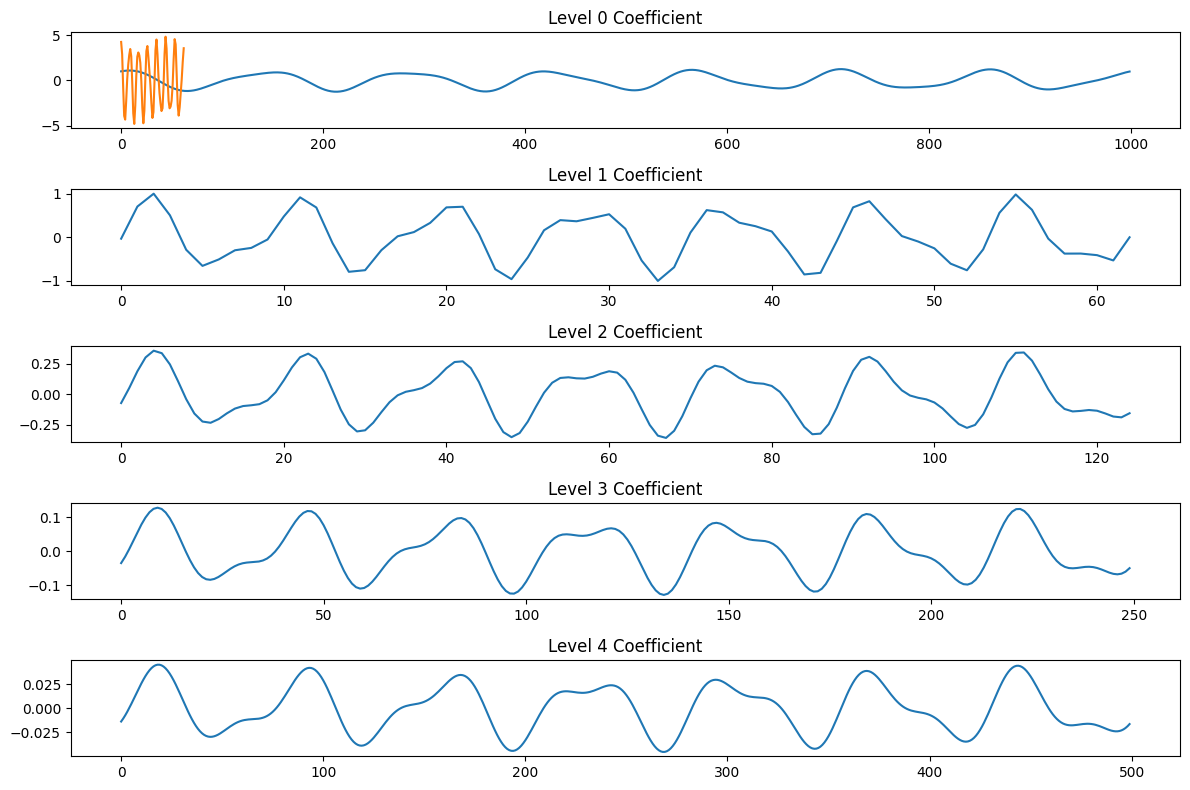

In [72]:
# Generate a sample time series
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2 * np.pi * 7 * t) + 0.25 * np.sin(2 * np.pi * 13 * t)

# Perform wavelet decomposition
coeffs = pywt.wavedec(signal, 'db1', level=4)

# Plot the original signal and wavelet components
plt.figure(figsize=(12, 8))
plt.subplot(5, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

for i, coeff in enumerate(coeffs):
    plt.subplot(5, 1, i+1)
    plt.plot(coeff)
    plt.title(f'Level {i} Coefficient')
    
plt.tight_layout()
plt.show()


## 2. Dynamic Time Warping (DTW) for Similarity Features

DTW is a technique to measure the similarity between two sequences which may vary in time or speed. It's often used in time series classification and clustering tasks.


In [77]:
!pip install dtw

  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5300 sha256=d2ba54c49a24c8a1a9277ff75de32a2ab2516476cf2f2d9374e48a493ce5926a
  Stored in directory: /Users/mc/Library/Caches/pip/wheels/2c/16/01/ffea89493a0fcd29934418eb0bf10161470acf8d5647bab656
Successfully built dtw


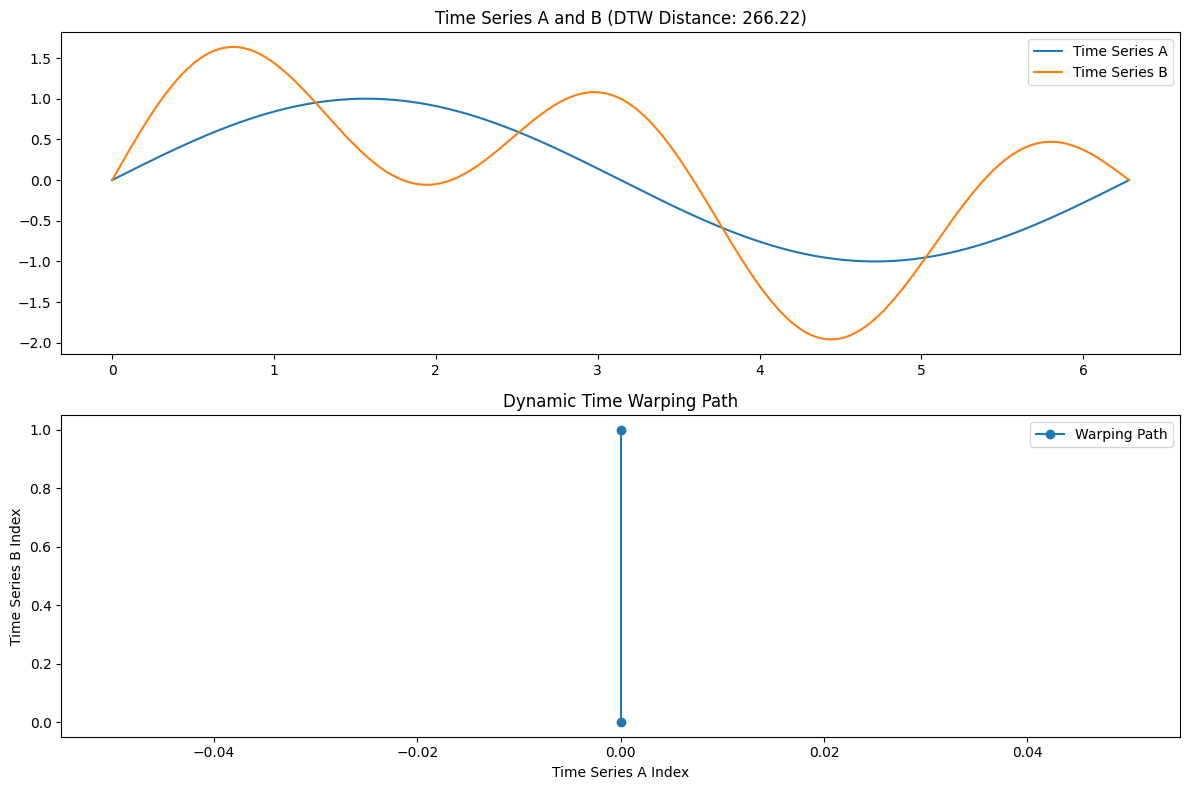

In [78]:
from dtw import dtw

# Generate two time series for demonstration
t = np.linspace(0, 2*np.pi, 800)
ts_a = np.sin(t)
ts_b = np.sin(t) + np.sin(t*2.5)

# Compute DTW
euclidean_norm = lambda x, y: np.abs(x - y)
d, cost_matrix, acc_cost_matrix, path = dtw(ts_a, ts_b, dist=euclidean_norm)

# Plot the two time series and the warping path
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, ts_a, label='Time Series A')
plt.plot(t, ts_b, label='Time Series B')
plt.title(f'Time Series A and B (DTW Distance: {d:.2f})')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot([point[0] for point in path], [point[1] for point in path], 'o-', label='Warping Path')
plt.title('Dynamic Time Warping Path')
plt.xlabel('Time Series A Index')
plt.ylabel('Time Series B Index')
plt.legend()

plt.tight_layout()
plt.show()


Dynamic Time Warping allows us to compare time series data that might be out-of-sync, stretched, or compressed in the time dimension. It's a powerful tool for tasks where temporal alignment is crucial.
